## Correlación (lineal) de Pearson o correlación de producto de momentos

Se le conoce también como  **r de Pearson** y es una de las medidas más utilizadas para evaluar la relación existente entre dos variables. Más aún, se dice que si:

1. La muestra estudiada está constituida por un número "grande" de observaciones.
2. Estas observaciones son independientes entre sí.
3. Las observaciones de cada variable provienen de una población normalmente distribuida.

**El coeficiente de correlación de Pearson muestral es el estimador más exacto que puede construirse del coeficiente de correlación poblacional.**

Este coeficiente se calcula de la siguiente manera:

$$\rho_{X,Y}={Cov(X,Y) \over {\sigma_X\sigma_Y} }$$

sin embargo será común que observemos la siguiente definición en los libros de estadística:

$$r_{X,Y}={Cov(X,Y) \over {s_X s_Y}}$$

la cual hace referencia a los parámetros muestrales.

Obviando lo anterior vale la pena notar que el coeficiente de correlación de Pearson es la covarianza entre $X$ y $Y$ después de éstas haber sido **estandarizadas**:

$$Z_X = {{X-E[X]}\over\sigma_X},~~~Z_Y = {{Y-E[Y]}\over\sigma_Y}$$

$$\rho_{X,Y} = Z_XZ_Y$$

Este coeficiente tiene la propiedad de que varía en el intervalo $[-1,1]$ y por lo tanto puede definirse la siguiente métrica o distancia:

$$d_{X,Y} = 1 - \rho(X,Y)$$

La cual se conoce como **distancia de Pearson** y cumple:

1. $d_{X,Y} = d_{Y,X}$
2. $d_{X,X} = 0$
3. $d_{X,Y} \geq 0$
4. Se cumple la desigualdad del triángulo.

Esta distancia suele emplearse en análisis de clustering.

### Relación de este coeficiente de correlación con el modelo de regresión lineal


Recordemos que el modelo de regresión lineal se construye considerando el siguiente planteamiento:

$$SE = \Sigma (O_i - P_i)^2 = \Sigma (y_i - \hat y_i)^2$$

Recordando que $y_i - \hat y_i$ representa la **la distancia vertical** entre las observaciones y sus predicciones.

Supongamos que únicamente estamos considerando una variable independiente $x_i$:

$$P_i = \hat y_i = \beta_0 + \beta_1x_i$$

Sabemos que el método de mínimos cuadrados (o de minimizar la función del error cuadrático) nos provee de valores para los parámetros $\beta$ tales que el polinomio $P_i$ representa el modelo lineal de ese orden que mejor aproxima los datos o en otras palabras, que captura la mayor cantidad de variación intrínseca de los mismos. Sin embargo **¿cómo sabemos cuánta variación están explicando nuestros datos? o en otras palabras ¿qué tan bueno es nuestro modelo lineal?**

Observermos que:

$$Var(\hat Y) = {1\over N} SE = {1\over N} \Sigma (y_i - \hat y_i)^2 = MSE$$

nótese además que:

$$Var(Y) = {1\over N} \Sigma (y_i - \bar Y)$$

Consideremos el siguiente ejemplo:

In [ ]:
import random, pylab, numpy

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() #discard header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

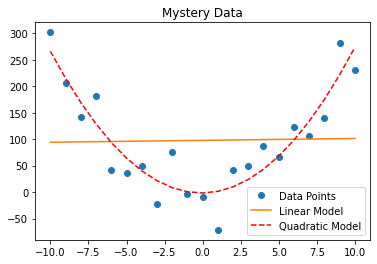

In [ ]:
xVals, yVals = getData('mysteryData.txt')
pylab.plot(xVals, yVals, 'o', label = 'Data Points')
pylab.title('Mystery Data')

#Try linear model
model1 = pylab.polyfit(xVals, yVals, 1)
pylab.plot(xVals, pylab.polyval(model1, xVals),label = 'Linear Model')
#
##Try a quadratic model
model2 = pylab.polyfit(xVals, yVals, 2)
pylab.plot(xVals, pylab.polyval(model2, xVals),
           'r--', label = 'Quadratic Model')
pylab.legend()

In [ ]:
##Compare models
def aveMeanSquareError(data, predicted):
    error = 0.0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

#code to compare fits for mystery data
estYVals = pylab.polyval(model1, xVals)
print('Ave. mean square error for linear model =',
      aveMeanSquareError(yVals, estYVals))
estYVals = pylab.polyval(model2, xVals)
print('Ave. mean square error for quadratic model =',
      aveMeanSquareError(yVals, estYVals))

Ave. mean square error for linear model = 9372.730789652882
Ave. mean square error for quadratic model = 1524.0204471835436


El MSE o error cuadrático promedio nos indica que el modelo cuadrático es mejor que el modelo lineal. Sin embargo, ¿habrá alguna manera de saber qué tan bueno o malo eso dicho número?. Sí la hay, y es obteniendo una métrica independiente de la escala en la que varían los datos.

### Coeficiente de determinación ($r^2$)

Dado un modelo lineal definimos al coeficiente de determinación asociado al mismo:

$$r^2 = 1 - {{Var(\hat Y)}\over{Var(Y)}} = 1 - {{MSE}\over{Var(Y)}} = 1 - {{\Sigma(y_i - \hat y_i)^2}\over{\Sigma(y_i - \bar Y)^2}}$$

Notemos que si $r^2 = 1$ esto ocurre si y sólo si $MSE = 0 = Var(\hat Y)$, lo cual reflejaría un ajuste perfecto de las $\hat y_i$ respecto a las $y_i$, es decir de las predicciones con respecto a las observaciones. Por otra parte, si $MSE = Var(Y)$ entonces $r^2 = 0$, y esto nos indicaría que los valores predichos por el modelo varían tanto como si no ajustáramos modelo alguno a las observaciones.

In [ ]:
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))

def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

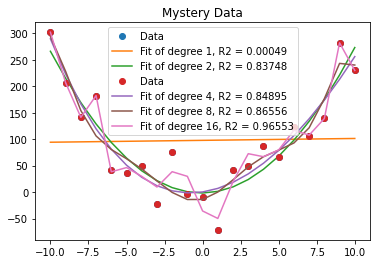

In [ ]:
xVals, yVals = getData('mysteryData.txt')
degrees = (1, 2)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

#Compare higher-order fits
degrees = (4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')